Importation des fichiers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Affichage de quelques images

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

(14, 15)
(21, 22)
(21, 26)
(21, 27)
(21, 26)


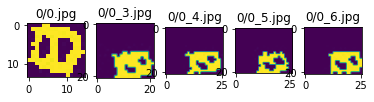

In [ ]:
from PIL import Image 
from os import listdir
import random

img_folder=r'/content/drive/My Drive/numérisation carte/0/'

def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)
    return loadedImages

# your images in an array
imgs = loadImages(img_folder)

imagesList = listdir(img_folder)
zeroimages = []
for i in range(0, len(imagesList)):
  if imagesList[i][0] == '0':
    image=img_folder + imagesList[i]
    zeroimages.append(image)

for i in range(5):
    img=mpimg.imread(zeroimages[i])
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(zeroimages[i][43:])
    plt.imshow(img)
    print(img.shape)

Création d'une base de données

In [ ]:
IMG_WIDTH=32
IMG_HEIGHT=32


img_folder=r'/content/drive/My Drive/numérisation carte/'

def create_dataset(img_folder):
  img_data_array=[]
  class_name=[] 
  for dir1 in os.listdir(img_folder):
    for file in os.listdir(os.path.join(img_folder, dir1)):
      image_path= os.path.join(img_folder, dir1,  file)
      image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
      image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
      #on normalise
      image=np.array(image)
      image = image.astype('float32')
      image /= 255 
      #image = image.reshape(20, 20, 3)
      #print(image.shape)
      img_data_array.append(image)
      class_name.append(dir1)
  return img_data_array, class_name

img_data, class_name = create_dataset(img_folder)

NameError: ignored

In [ ]:
len(img_data)

175

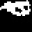

0(point)


In [ ]:
img = img_data[1]*255

from google.colab.patches import cv2_imshow
cv2_imshow(img)
print(class_name[1])

In [ ]:
img_data = tf.expand_dims(img_data, axis=-1)

In [ ]:
np.array(img_data, np.float32).shape

(175, 32, 32, 1)

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'0': 0, '0(point)': 1, 'other': 2}

In [ ]:
target_val=  [class_name[i] for i in range(len(class_name))]
target_val[0]

'0(point)'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
values = array(target_val)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[0:10])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


Modèle

In [ ]:
model=tf.keras.Sequential(
 [
 tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
 tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation="relu"),
# tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu"),
# tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(3, activation='softmax')
 ])

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(x=np.array(img_data, np.float32), y=np.array(onehot_encoded, np.float32), epochs=5, callbacks=[callback])
history = model.fit(x=np.array(img_data, np.float32), y=np.array(onehot_encoded, np.float32), epochs=10)

Epoch 1/10
6/6 [==============================] - 1s 42ms/step - loss: 0.6249 - accuracy: 0.5395
Epoch 2/10
6/6 [==============================] - 0s 38ms/step - loss: 0.4788 - accuracy: 0.6593
Epoch 3/10
6/6 [==============================] - 0s 36ms/step - loss: 0.3596 - accuracy: 0.8592
Epoch 4/10
6/6 [==============================] - 0s 36ms/step - loss: 0.2936 - accuracy: 0.8796
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 0.2552 - accuracy: 0.8839
Epoch 6/10
6/6 [==============================] - 0s 34ms/step - loss: 0.1990 - accuracy: 0.9034
Epoch 7/10
6/6 [==============================] - 0s 32ms/step - loss: 0.1721 - accuracy: 0.9250
Epoch 8/10
6/6 [==============================] - 0s 34ms/step - loss: 0.1263 - accuracy: 0.9549
Epoch 9/10
6/6 [==============================] - 0s 34ms/step - loss: 0.1352 - accuracy: 0.9320
Epoch 10/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0898 - accuracy: 0.9641


In [ ]:
import time
t = time.time()
path = "/content/drive/My Drive/ocr.h5".format(int(t))
model.save(path)

Tests

In [ ]:
val_0_path = '/content/drive/My Drive/numérisation carte val/0'

val_0 = []

for file in os.listdir(val_0_path):
  image_path= os.path.join(val_0_path, file)
  image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
  image= np.array(image)
  image = image.astype('float32')
  image /= 255 
  val_0.append(image)

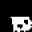

In [ ]:
img_to_predict = val_0[0]
cv2_imshow(img_to_predict*255)

In [ ]:
val_0 = tf.expand_dims(val_0, axis=-1)

In [ ]:
np.array(val_0, np.float32).shape

(10, 32, 32, 1)

In [ ]:
img_to_predict = np.array(val_0[0])
img_to_predict = tf.expand_dims(img_to_predict, axis=0)
img_to_predict.shape

TensorShape([1, 32, 32, 1])

In [ ]:
res = model.predict_classes(np.array(val_0, np.float32))
res

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [ ]:
val_path = '/content/drive/My Drive/numérisation carte val/0(point)'

val = []

for file in os.listdir(val_path):
  image_path= os.path.join(val_path, file)
  image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
  image= np.array(image)
  image = image.astype('float32')
  image /= 255 
  val.append(image)

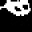

In [ ]:
img_to_predict = val[0]
cv2_imshow(img_to_predict*255)

In [ ]:
val = tf.expand_dims(val, axis=-1)

In [ ]:
np.array(val, np.float32).shape

(10, 32, 32, 1)

In [ ]:
img_to_predict = np.array(val[0])
img_to_predict = tf.expand_dims(img_to_predict, axis=0)
img_to_predict.shape

TensorShape([1, 32, 32, 1])

In [ ]:
res = model.predict_classes(np.array(val, np.float32))
res

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 2, 1, 2, 2, 1, 1, 1, 1])

RandomForest

In [ ]:
IMG_WIDTH=32
IMG_HEIGHT=32

img_folder=r'/content/drive/My Drive/numérisation carte/'

def create_dataset(img_folder):
  img_data_array=[]
  class_name=[] 
  for dir1 in os.listdir(img_folder):
    for file in os.listdir(os.path.join(img_folder, dir1)):
      image_path = os.path.join(img_folder, dir1,  file)
      image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
      img_data_array.append(image.flatten())
      class_name.append(dir1)
  return img_data_array, class_name

img_data, class_name = create_dataset(img_folder)

In [ ]:
img_data = np.array(img_data)
img_data.shape

(175, 1024)

In [ ]:
class_name = np.array(onehot_encoded, np.float32)
class_name.shape

(175, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, class_name, test_size=0.2, random_state=0) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("precision_score :" , precision_score(y_test, y_pred, average='weighted'))
print("accuracy_score :" , accuracy_score(y_test, y_pred)) 

precision_score : 0.9476190476190476
accuracy_score : 0.8857142857142857


Tests

In [ ]:
val_0_path = '/content/drive/My Drive/numérisation carte val/0'

val_0 = []

for file in os.listdir(val_0_path):
  image_path= os.path.join(val_0_path, file)
  image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
  val_0.append(image.flatten())

In [ ]:
val_0

[array([0, 0, 0, ..., 1, 1, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([1, 1, 0, ..., 1, 2, 2], dtype=uint8),
 array([0, 0, 1, ..., 1, 2, 2], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 2, ..., 0, 0, 0], dtype=uint8),
 array([1, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([1, 1, 1, ..., 3, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 2, 0, 0], dtype=uint8)]

In [ ]:
val_0 = np.array(val_0)
val_0.shape

(10, 1024)

In [ ]:
img_to_predict = tf.expand_dims(val_0, axis=0)
img_to_predict.shape

TensorShape([1, 10, 1024])

In [ ]:
clf.predict(val_0)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)

In [ ]:
val_path = '/content/drive/My Drive/numérisation carte val/0(point)'

val = []

for file in os.listdir(val_path):
  image_path= os.path.join(val_path, file)
  image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
  val.append(image.flatten())

In [ ]:
val

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 3, ..., 1, 0, 0], dtype=uint8),
 array([0, 0, 1, ..., 0, 1, 2], dtype=uint8),
 array([2, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 4, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 1, ..., 0, 0, 0], dtype=uint8),
 array([2, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([1, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [ ]:
val = np.array(val)
val.shape

(10, 1024)

In [ ]:
img_to_predict = tf.expand_dims(val, axis=0)
img_to_predict.shape

TensorShape([1, 10, 1024])

In [ ]:
clf.predict(val)

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

Modèle pour MNIST 0-9

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

import tensorflow as tf

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


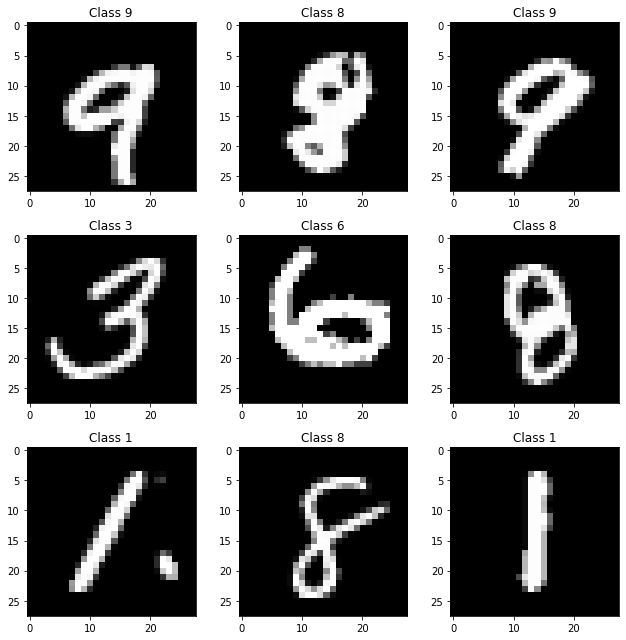

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [ ]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model=tf.keras.Sequential(
 [
 tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
 tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
 tf.keras.layers.BatchNormalization(axis=-1),
 tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
 tf.keras.layers.BatchNormalization(axis=-1),
 tf.keras.layers.MaxPooling2D(pool_size=(2,2)),   
 tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
 tf.keras.layers.BatchNormalization(axis=-1),
 tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
 tf.keras.layers.BatchNormalization(axis=-1),
 tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Activation('relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10, activation='softmax')
 ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 272s 578ms/step - loss: 0.1614 - accuracy: 0.9476
Epoch 2/5
469/469 [==============================] - 272s 580ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 3/5
469/469 [==============================] - 269s 573ms/step - loss: 0.0164 - accuracy: 0.9946
Epoch 4/5
469/469 [==============================] - 267s 570ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 5/5
469/469 [==============================] - 269s 573ms/step - loss: 0.0105 - accuracy: 0.9965


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 12s 38ms/step - loss: 0.0272 - accuracy: 0.9919
Test score: 0.02721954695880413
Test accuracy: 0.9919000267982483


In [ ]:
test = X_test[0:10]
print(test.shape)
#plt.imshow(test, cmap='gray', interpolation='none')

(10, 28, 28, 1)


In [ ]:
test = np.squeeze(test)
test.shape

(10, 28, 28)

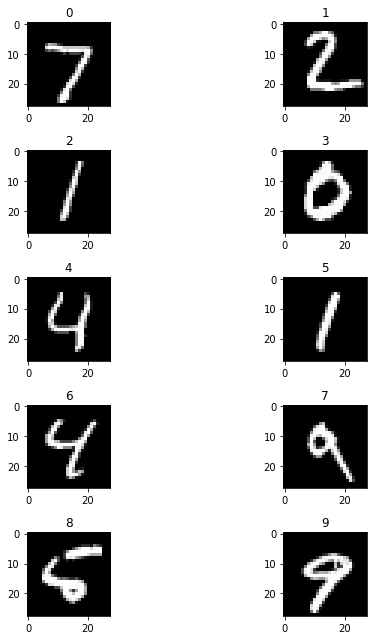

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.imshow(test[i], cmap='gray', interpolation='none')
  plt.title((i))
plt.tight_layout()

In [ ]:
model.predict_classes(tf.expand_dims(test, axis=-1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
import time
t = time.time()
path = "/content/drive/My Drive/minst.h5".format(int(t))
model.save(path)

In [ ]:
export_path_keras = "/content/drive/My Drive/minst.h5"

reloaded = tf.keras.models.load_model(export_path_keras)

reloaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)       

In [ ]:
from google.colab import files
files.download("/content/drive/My Drive/minst.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>